# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Keep track of records and calls
record = 1
record_set = 1

# create empty lists to hold weather data for each city
weatherCities = []
windspeed = []
cloudiness = []
humidity = []
temps = []
latitudes = []
longitudes = []

# loop through all cities and get weather data
for x in range (len(cities)):
    weather_city = cities[x]
    # api query url and response
    query = f"https://api.openweathermap.org/data/2.5/weather?q={weather_city}&units=imperial&appid={weather_api_key}"
    response = requests.get(query)
    response_json = response.json()
    
    # try to pull in data for each city
    try:
        weatherCities.append(response_json['name'])
        windspeed.append(response_json['wind']['speed'])
        cloudiness.append(response_json['clouds']['all'])
        humidity.append(response_json['main']['humidity'])
        temps.append(response_json['main']['temp'])
        latitudes.append(response_json['coord']['lat'])
        longitudes.append(response_json['coord']['lon'])
        print(f"Processing Record {record} of Set {record_set} | {weather_city}")
        # Print records in sets of 50
        if record < 50:
            record += 1
        else:
            record = 1
            record_set += 1    
    # handle exceptions if weather data is not available for city
    except:
        print(f"City not found. Skipping... | {weather_city}")
        pass
    

Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | borogontsy
Processing Record 5 of Set 1 | busselton
City not found. Skipping... | illoqqortoormiut
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | bonthe
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | timra
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | molln
Processing Record 14 of Set 1 | angoche
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | chokurdakh
City not found. Skipping... | marcona
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | tezu
Processing Record 21 of Set 1 | saint anthony
Processing Record 22 of Set 1 | tual
Processing Record 23 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# create a data frame with city weather data
data_dict = {
    "City": weatherCities,
    "Lat": latitudes,
    "Lon": longitudes,
    "Temp": temps,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
}

weather_data = pd.DataFrame(data_dict)
weather_data.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed
0,Carnarvon,-24.87,113.63,73.40,69,40,16.11
1,Ushuaia,-54.80,-68.30,57.20,47,40,20.80
2,Narsaq,60.92,-46.05,28.40,74,100,3.36
3,Borogontsy,62.67,131.17,-10.08,89,97,4.99
4,Busselton,-33.65,115.33,66.00,83,97,1.01


In [36]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
# Export data to csv
weather_data.to_csv(output_data_file, index=False, header=True)

In [37]:
weather_data.count()

City          582
Lat           582
Lon           582
Temp          582
Humidity      582
Cloudiness    582
Windspeed     582
dtype: int64

In [38]:
weather_data.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,22.357010,18.382491,56.468368,74.240550,48.372852,8.294433
std,33.372127,90.616749,23.130288,18.661599,41.519050,5.722332
min,-54.800000,-179.170000,-12.600000,9.000000,0.000000,0.110000
25%,-4.357500,-63.450000,40.095000,66.000000,1.000000,4.030000
50%,26.470000,21.120000,61.385000,78.000000,40.000000,6.930000
75%,51.097500,99.460000,75.945000,88.000000,92.750000,11.320000
max,78.220000,179.320000,91.400000,100.000000,100.000000,32.680000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

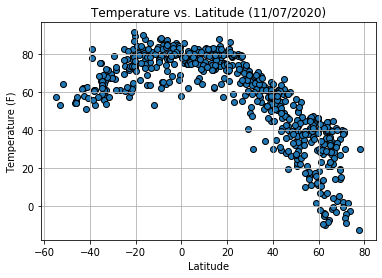

In [65]:
plt.scatter(weather_data["Lat"],weather_data["Temp"], edgecolors="black")
plt.title("Temperature vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("../Images/latitude-temperature.png")
plt.show();

### Analysis
- Temperature is warmest near the equator
- Temperature is higher on average in the Southern Hemisphere. Is this true at all times of year or just right now?
- Based on this sample, it appears populated areas in the Southern Hemisphere are closer to the equator

## Latitude vs. Humidity Plot

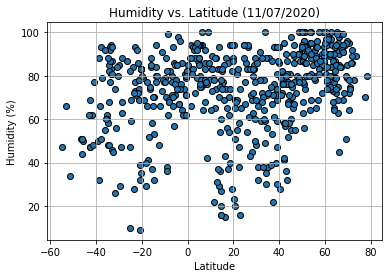

In [66]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], edgecolors="black")
plt.title("Humidity vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../Images/latitude-humidity.png")
plt.show();

### Analysis
- Humidity in cities near the equator was at least 60%
- Cities above 60 deg north, were clustered in terms of humidity. Most above 80%
- Most variability in humidity occured in cities 20-40 deg north/south of the equator

## Latitude vs. Cloudiness Plot

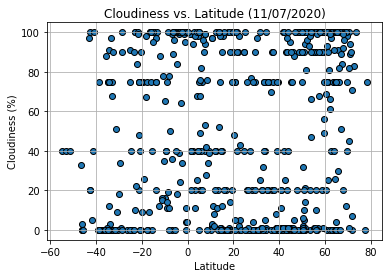

In [67]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], edgecolors="black")
plt.title("Cloudiness vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../Images/latitude-cloudiness.png")
plt.show();

### Analysis
- There doesn't appear to be a relationship between cloudiness and latitude

## Latitude vs. Wind Speed Plot

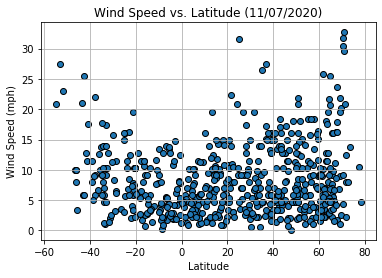

In [68]:
plt.scatter(weather_data["Lat"],weather_data["Windspeed"], edgecolors="black")
plt.title("Wind Speed vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("../Images/latitude-wind_speed.png")
plt.show();

### Analysis
- Higher windspeeds were found in cities furthest from the equator
- Need to compare data across multiple days to make any additonal predictions

## Linear Regression

In [69]:
# OPTIONAL: Create a function to create Linear Regression plots
def linRegression(x, y):
    f_slope, f_int, f_r, f_p, f_std_err = stats.linregress(x, y)
    line_fit = f_slope * x + f_int
    rSquare = f_r * f_r
    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, line_fit, c="red")
    print(f"The r-squared is: {rSquare}")
    print(f"Regression Line : y = {f_slope}x + {f_int}")
    

In [70]:
# Create Northern and Southern Hemisphere DataFrames
southern = weather_data.loc[weather_data["Lat"] < 0]
southern.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed
0,Carnarvon,-24.87,113.63,73.4,69,40,16.11
1,Ushuaia,-54.80,-68.30,57.2,47,40,20.80
4,Busselton,-33.65,115.33,66.0,83,97,1.01
5,Kaitangata,-46.28,169.85,55.0,44,0,8.01
7,Port Alfred,-33.59,26.89,66.0,81,0,10.25


In [71]:
northern = weather_data.loc[weather_data["Lat"] > 0]
northern.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed
2,Narsaq,60.92,-46.05,28.40,74,100,3.36
3,Borogontsy,62.67,131.17,-10.08,89,97,4.99
6,Bonthe,7.53,-12.51,79.34,86,99,4.83
8,Jamestown,42.10,-79.24,60.80,41,1,5.82
9,Hilo,19.73,-155.09,72.73,88,90,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760111824737384
Regression Line : y = -1.0080610885106747x + 90.31005550331044


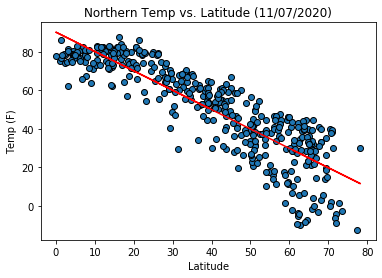

In [89]:
plt.title("Northern Temp vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
linRegression(northern["Lat"], northern["Temp"])
plt.savefig("../Images/northern-temp-regression.png")
plt.show();

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4194994915197428
Regression Line : y = 0.4827367487679235x + 82.10422713372171


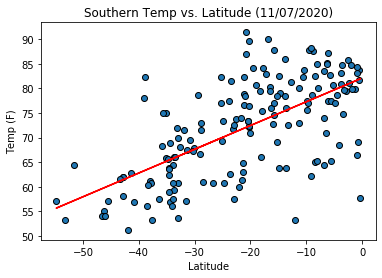

In [88]:
plt.title("Southern Temp vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
# run regression function and create plot
linRegression(southern["Lat"], southern["Temp"])
plt.savefig("../Images/southern-temp-regression.png")
plt.show();

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07498436566571272
Regression Line : y = 0.24203427104931347x + 66.83543312460631


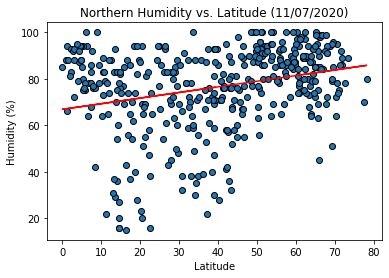

In [87]:
plt.title("Northern Humidity vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# run regression function and create plot
linRegression(northern["Lat"], northern["Humidity"])
plt.savefig("../Images/northern-humidity-regression.png")
plt.show();

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06262054850324353
Regression Line : y = 0.3395493879143733x + 75.94010429785455


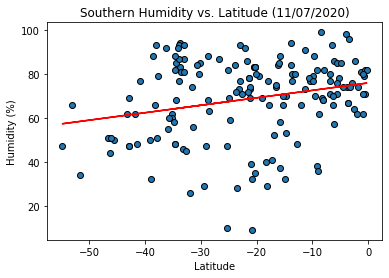

In [86]:
plt.title("Southern Humidity vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# run regression function and create plot
linRegression(southern["Lat"], southern["Humidity"])
plt.savefig("../Images/southern-humidity-regression.png")
plt.show();

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03200986012656902
Regression Line : y = 0.36107479493884015x + 34.00530134100243


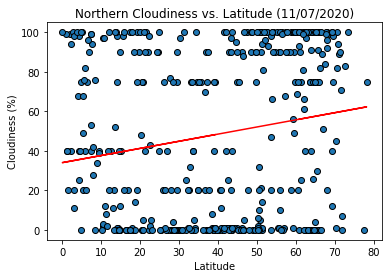

In [85]:
plt.title("Northern Cloudiness vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# run regression function and create plot
linRegression(northern["Lat"], northern["Cloudiness"])
plt.savefig("../Images/northern-cloudiness-regression.png")
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10166036208952409
Regression Line : y = 0.9585322800852931x + 68.9008851901585


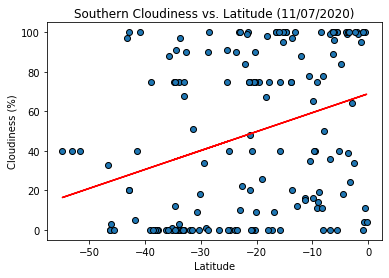

In [84]:
plt.title("Southern Cloudiness vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# run regression function and create plot
linRegression(southern["Lat"], southern["Cloudiness"])
plt.savefig("../Images/southern-cloudiness-regression.png")
plt.show();

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04134357194655395
Regression Line : y = 0.05789303623767589x + 6.083366992471564


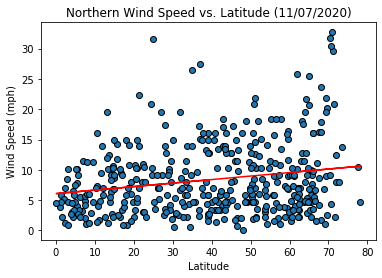

In [83]:
plt.title("Northern Wind Speed vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# run regression function and create plot
linRegression(northern["Lat"], northern["Windspeed"])
plt.savefig("../Images/northern-wind_speed-regression.png")
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-squared is: 0.17861694160330907
Regression Line : y = -0.16328141734341234x + 4.618728878942504


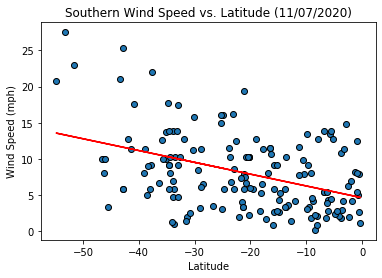

In [82]:
plt.title("Southern Wind Speed vs. Latitude (11/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# run regression function and create plot
linRegression(southern["Lat"], southern["Windspeed"])
plt.savefig("../Images/southern-wind_speed-regression.png")
plt.show();